In [0]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import matplotlib.pyplot as plt 

In [7]:
%matplotlib inline

# Load the online news dataset
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
# Get the statistics of target attribute
num_shares = data[data.keys()[-1]]
num_shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [0]:
from sklearn import preprocessing

#Encode the label
label_encoder = preprocessing.LabelEncoder()
label_popularity = pd.Series(label_encoder.fit_transform(num_shares>=1400))

In [10]:
# Collect features from the dataset
raw_features = data.drop(['url', data.keys()[1], data.keys()[-1]], axis=1) 
raw_features.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


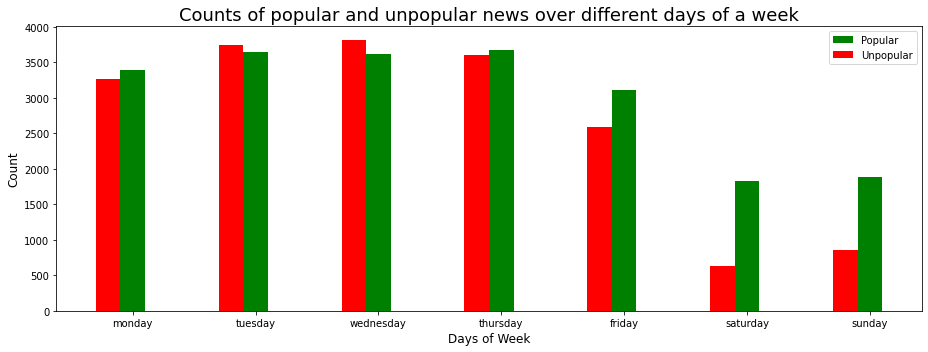

In [11]:
# Displaying the days of week ragarding popularity and unpopularity
days = raw_features.columns.values[29:36]
not_popular = data[data[' shares']<1400]
popular = data[data[' shares']>=1400]
day_not_popular = not_popular[days].sum().values
day_popular = popular[days].sum().values

column_names = [day.split("_")[-1] for day in days]

fig = plt.figure(figsize=(13, 5))
plt.title("Counts of popular and unpopular news over different days of a week", fontsize=18)
plt.bar(np.arange(len(days)), day_popular, width=0.2, align='center', color='green', label='Popular')
plt.bar(np.arange(len(days)) - 0.2, day_not_popular, width=0.2, align='center', color='red', label='Unpopular')
plt.xticks(np.arange(len(days)), column_names)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Days of Week", fontsize=12)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("days_bar.jpg")
plt.show()

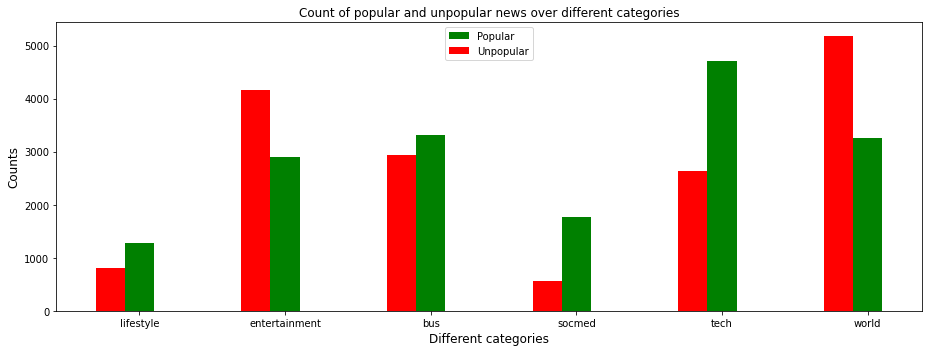

In [12]:
# Display graph according to article category
data_channels = raw_features.columns.values[11:17]
unpopular_channels = not_popular[data_channels].sum().values
popular_channels = popular[data_channels].sum().values

column_names = [name.split("_")[-1] for name in data_channels]

fig = plt.figure(figsize=(13,5))
plt.title("Count of popular and unpopular news over different categories")
plt.bar(np.arange(len(data_channels)), popular_channels, width=0.2, align='center', color='green', label='Popular')
plt.bar(np.arange(len(data_channels)) - 0.2, unpopular_channels, width=0.2, align='center', color='red', label='Unpopular')
plt.xticks(np.arange(len(data_channels)), column_names)
plt.xlabel("Different categories", fontsize=12)
plt.ylabel("Counts", fontsize=12)
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig("channels_bar.jpg")
plt.show()

In [0]:
# Normalizing the features that are numerical
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
numerical_features = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos', ' average_token_length',' num_keywords',' self_reference_min_shares',' self_reference_max_shares', ' self_reference_avg_sharess']
raw_features[numerical_features] = scaler.fit_transform(data[numerical_features])
raw_features.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.476190,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000588,0.000588,0.000588,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,0.333333,0.030092,0.604743,1.0,0.791946,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,0.333333,0.024900,0.575130,1.0,0.663866,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001089,0.001089,0.001089,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,0.333333,0.062662,0.503788,1.0,0.665635,0.029605,0.000000,0.007812,0.0,0.547768,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,0.523810,0.126505,0.415646,1.0,0.540890,0.062500,0.163793,0.156250,0.0,0.582331,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000646,0.018973,0.003737,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [0]:
# importing PCA
from sklearn.decomposition import PCA

def getReducedData(raw_features, n_components, columns):
    '''
     Inputs:
      - raw_features: features of the dataset
      - n_components: number of components for PCA
      - columns: list of columns for PCA 
    '''

    pca = PCA(n_components=n_components).fit(raw_features)

    reduced_features = pca.transform(raw_features)
    reduced_features = pd.DataFrame(reduced_features, columns=columns)
    populars = reduced_features[data[' shares'] >= 1400]
    unpopulars = reduced_features[data[' shares'] < 1400]
    
    return populars, unpopulars

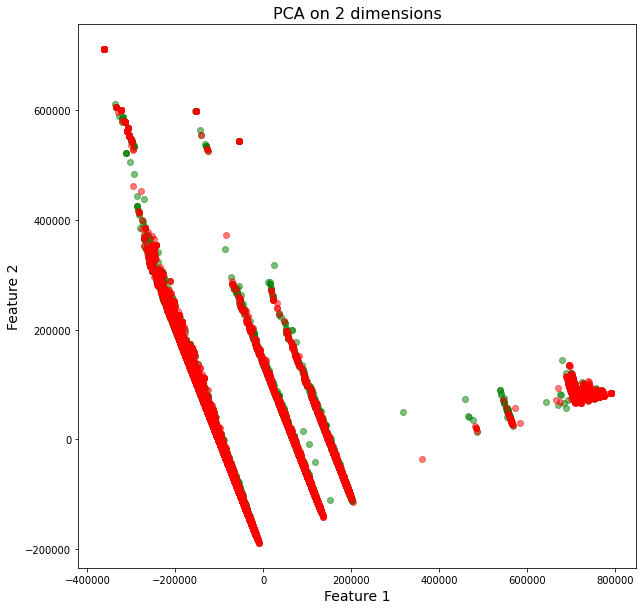

In [16]:
# Display reduced data using scatter plot
populars, unpopulars = getReducedData(raw_features, n_components=2, columns=["Feature 1", "Feature 2"])

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=populars.loc[:, 'Feature 1'], y=populars.loc[:, 'Feature 2'], c='g', alpha=0.5)
ax.scatter(x=unpopulars.loc[:, 'Feature 1'], y=unpopulars.loc[:, 'Feature 2'], c='r', alpha=0.5)
ax.set_xlabel("Feature 1", fontsize=14)
ax.set_ylabel("Feature 2", fontsize=14)
ax.set_title("PCA on 2 dimensions", fontsize=16)
plt.savefig("PCA2d.jpg")

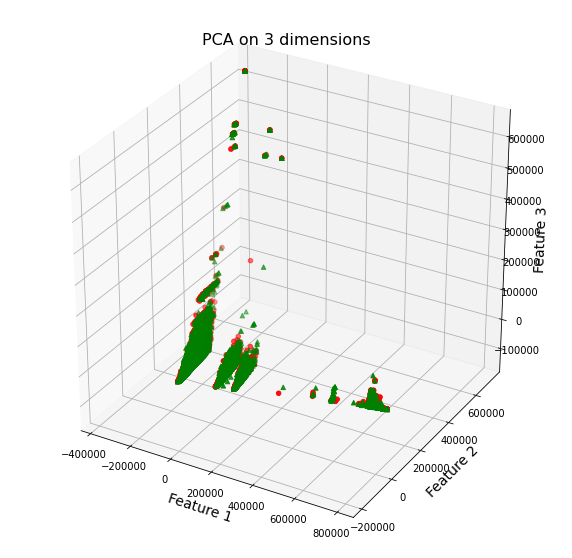

In [17]:
# Displaying 3D visualization of reduced data
from mpl_toolkits.mplot3d import Axes3D
populars, unpopulars = getReducedData(raw_features, n_components=3, columns=["Feature 1", "Feature 2", "Feature 3"])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(populars.loc[:, 'Feature 1'], populars.loc[:, 'Feature 2'], populars.loc[:, 'Feature 3'], c='g', marker='^')
ax.scatter(unpopulars.loc[:, 'Feature 1'], unpopulars.loc[:, 'Feature 2'], unpopulars.loc[:, 'Feature 3'], c='r')
ax.set_xlabel("Feature 1", fontsize=14)
ax.set_ylabel("Feature 2", fontsize=14)
ax.set_zlabel("Feature 3", fontsize=14)
ax.set_title("PCA on 3 dimensions", fontsize=16)
plt.savefig("PCA3d.jpg")

In [0]:
# Feature Selection using RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

estimator = AdaBoostClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(raw_features, label_popularity)
selector.ranking_

estimator_LR = LogisticRegression(random_state=0)
selector_LR = RFECV(estimator_LR, step=1, cv=5)
selector_LR = selector_LR.fit(raw_features, label_popularity)
selector_LR.ranking_

estimator_RF = RandomForestClassifier(random_state=0)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(raw_features, label_popularity)
selector_RF.ranking_

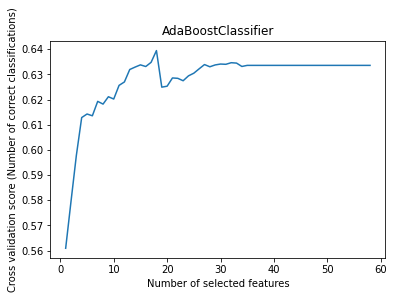

18
[' n_non_stop_unique_tokens' ' num_self_hrefs' ' num_imgs' ' num_videos'
 ' num_keywords' ' data_channel_is_entertainment'
 ' data_channel_is_socmed' ' kw_min_min' ' kw_avg_min' ' kw_min_max'
 ' kw_max_max' ' kw_min_avg' ' kw_max_avg' ' kw_avg_avg'
 ' self_reference_min_shares' ' self_reference_max_shares'
 ' global_subjectivity' ' global_sentiment_polarity']


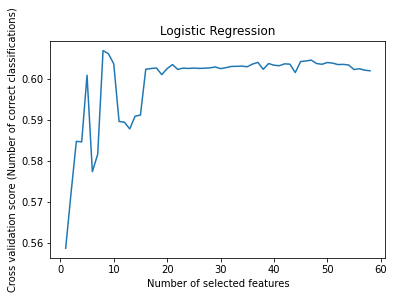

8
[' data_channel_is_entertainment' ' data_channel_is_world' ' kw_max_min'
 ' kw_avg_min' ' kw_min_avg' ' kw_max_avg' ' kw_avg_avg' ' is_weekend']


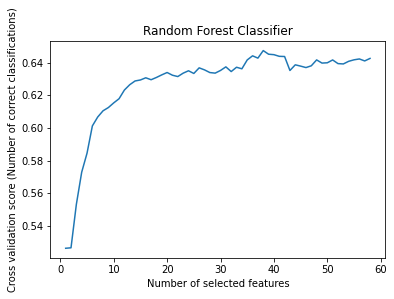

38
[' n_tokens_title' ' n_tokens_content' ' n_unique_tokens'
 ' n_non_stop_unique_tokens' ' num_hrefs' ' num_self_hrefs' ' num_imgs'
 ' average_token_length' ' kw_max_min' ' kw_avg_min' ' kw_min_max'
 ' kw_avg_max' ' kw_min_avg' ' kw_max_avg' ' kw_avg_avg'
 ' self_reference_min_shares' ' self_reference_max_shares'
 ' self_reference_avg_sharess' ' is_weekend' ' LDA_00' ' LDA_01' ' LDA_02'
 ' LDA_03' ' LDA_04' ' global_subjectivity' ' global_sentiment_polarity'
 ' global_rate_positive_words' ' global_rate_negative_words'
 ' rate_positive_words' ' rate_negative_words' ' avg_positive_polarity'
 ' min_positive_polarity' ' avg_negative_polarity'
 ' min_negative_polarity' ' max_negative_polarity' ' title_subjectivity'
 ' title_sentiment_polarity' ' abs_title_subjectivity']


In [0]:
# Plotting the cv score versus number of features

# AdaBoostClassifier
plt.figure()
plt.title("AdaBoostClassifier")
plt.xlabel("Number of selected features")
plt.ylabel("Cross validation score (Number of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.savefig('RFE_ADA.jpg')
plt.show()

print(raw_features.columns.values[selector.ranking_==1].shape[0])
print(raw_features.columns.values[selector.ranking_==1])
features_ADA = raw_features[raw_features.columns.values[selector.ranking_==1]]

# Logistic Regression
plt.figure()
plt.title("Logistic Regression")
plt.xlabel("Number of selected features")
plt.ylabel("Cross validation score (Number of correct classifications)")
plt.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
plt.savefig('RFE_LR.jpg')
plt.show()

print(raw_features.columns.values[selector_LR.ranking_==1].shape[0])
print(raw_features.columns.values[selector_LR.ranking_==1])
features_LR = raw_features[raw_features.columns.values[selector_LR.ranking_==1]]

# Random Forest Classifier
plt.figure()
plt.title("Random Forest Classifier")
plt.xlabel("Number of selected features")
plt.ylabel("Cross validation score (Number of correct classifications)")
plt.plot(range(1, len(selector_RF.grid_scores_) + 1), selector_RF.grid_scores_)
plt.savefig('RFE_RF.jpg')
plt.show()

print(raw_features.columns.values[selector_RF.ranking_==1].shape[0])
print(raw_features.columns.values[selector_RF.ranking_==1])
features_RF = raw_features[raw_features.columns.values[selector_RF.ranking_==1]]

In [0]:
# Split the data into training and testing sets
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, label_popularity, test_size=0.1, random_state=0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, label_popularity, test_size=0.1, random_state=0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, label_popularity, test_size=0.1, random_state=0)

In [0]:
def train_predict(model, sample_size, X_train, y_train, X_test, y_test):
  
  '''
  Inputs:
    - model: model to be trained and predicted
    - sample_size: the size of the sample to get from training set
    - X_train: features of training set
    - y_train: target feature of training set
    - X_test: features of test set
    - y_test: target feature of test set 

  '''

  result = {}
  
  start = time() # Start time
  model.fit(X_train[:sample_size], y_train[:sample_size])
  end = time() # Stop time

  result['train_time'] = end-start

  # Predictions on the first 3500 training samples
  start = time()
  output_train = model.predict(X_train[:3500])
  output_test = model.predict(X_test)
  end = time()

  # Calculate the prediction time
  result['predict_time'] = end-start
  
  # Calculate the accuracy score on the first 3500 train samples
  result['train_acc'] = accuracy_score(y_train[:3500], output_train)
  
  # Calculate the accuracy score on the test sample
  result['test_acc'] = accuracy_score(y_test, output_test)

  # Calculate the F1 score on the first 3500 training samples
  result['train_F'] = fbeta_score(y_train[:3500], output_train, beta=1)
  
  # Calculate the F1 score on the test sample
  result['test_F'] = fbeta_score(y_test, output_test, beta=1)
  
  # Calculate the AUC score on the first 3500 training samples
  result['train_auc'] = roc_auc_score(y_train[:3500], output_train)
  
  # Calculate the AUC score on the test sample
  result['test_auc'] = roc_auc_score(y_test, output_test)

  print("{} model is trained on {} sample data \n".format(model.__class__.__name__, sample_size))
  print("Accuracy score: {} \nF1: {} \nAUC {}".format(result["test_acc"], result["test_F"], result["test_auc"]))
  
  return result


In [0]:
import matplotlib.patches as mp

# Function to visualize the results of models
def evaluate(result, file_name):
  '''
  Inputs:
    - result: dictionary of a list of models with their relevant scores
    - file_name: name of the file to save the visualization results
  '''
  # Creating a figure
  fig, ax = plt.subplots(2, 4, figsize=(16, 7))

  # Constants
  bar_width = 0.3
  colors = ['#A00000', '#00A000','#00A0A0']

  for i, model in enumerate(result.keys()):
    for j, metric in enumerate(['train_time', 'train_acc', 'train_F', 'train_auc', 'predict_time', 'test_acc', 'test_F', 'test_auc']):
      for k in np.arange(3):
        ax[j//4, j%4].bar(k+i*bar_width, result[model][k][metric], width = bar_width, color = colors[i])
        ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
        ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
        ax[j//4, j%4].set_xlim((-0.1, 3.0))

  # Labels
  ax[0, 0].set_ylabel("Time (in seconds)")
  ax[0, 1].set_ylabel("Accuracy Score")
  ax[0, 2].set_ylabel("F-score")
  ax[0, 3].set_ylabel("AUC")
  ax[1, 0].set_ylabel("Time (in seconds)")
  ax[1, 1].set_ylabel("Accuracy Score")
  ax[1, 2].set_ylabel("F-score")
  ax[1, 3].set_ylabel("AUC")
  ax[1, 0].set_xlabel("Training Set Size")
  ax[1, 1].set_xlabel("Training Set Size")
  ax[1, 2].set_xlabel("Training Set Size")
  ax[1, 3].set_xlabel("Training Set Size")

  # Titles
  ax[0, 0].set_title("Model Training")
  ax[0, 1].set_title("Accuracy Score on Training Subset")
  ax[0, 2].set_title("F-score on Training Subset")
  ax[0, 3].set_title("AUC on Training Subset")
  ax[1, 0].set_title("Model Predicting")
  ax[1, 1].set_title("Accuracy Score on Testing Set")
  ax[1, 2].set_title("F-score on Testing Set")
  ax[1, 3].set_title("AUC on Training Subset")

  # Setting y-limits for the score panels
  ax[0, 1].set_ylim((0, 1))
  ax[0, 2].set_ylim((0, 1))
  ax[0, 3].set_ylim((0, 1))
  ax[1, 1].set_ylim((0, 1))
  ax[1, 2].set_ylim((0, 1))
  ax[1, 3].set_ylim((0, 1))

  # Patches for legend
  patches = []
  for i, model in enumerate(result.keys()):
    patches.append(mp.Patch(color=colors[i], label=model))
  plt.legend(handles=patches, bbox_to_anchor=(-1.4, 2.54), loc='upper center', borderaxespad=0., ncol=3, fontsize='x-large')

  plt.suptitle("Performance metrics for three Supervised Machine Learning Models", fontsize=16, y=1.10)
  plt.savefig(file_name)
  plt.tight_layout()
  plt.show()

AdaBoostClassifier model is trained on 356 sample data 

Accuracy score: 0.5823455233291299 
F1: 0.5868263473053892 
AUC 0.5832947299198052
AdaBoostClassifier model is trained on 3567 sample data 

Accuracy score: 0.6443883984867591 
F1: 0.6691694040356639 
AUC 0.6422416321999406
AdaBoostClassifier model is trained on 35679 sample data 

Accuracy score: 0.6542244640605296 
F1: 0.6831522995146753 
AUC 0.6512698567371206
LogisticRegression model is trained on 356 sample data 

Accuracy score: 0.6310214375788147 
F1: 0.666514702530203 
AUC 0.6272379563727007
LogisticRegression model is trained on 3567 sample data 

Accuracy score: 0.6224464060529634 
F1: 0.673215455140799 
AUC 0.6161541000651497
LogisticRegression model is trained on 35679 sample data 

Accuracy score: 0.6239596469104666 
F1: 0.6740983606557378 
AUC 0.6177481489493155
RandomForestClassifier model is trained on 356 sample data 

Accuracy score: 0.6141235813366961 
F1: 0.6420215255030417 
AUC 0.6117450205422879
RandomForest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


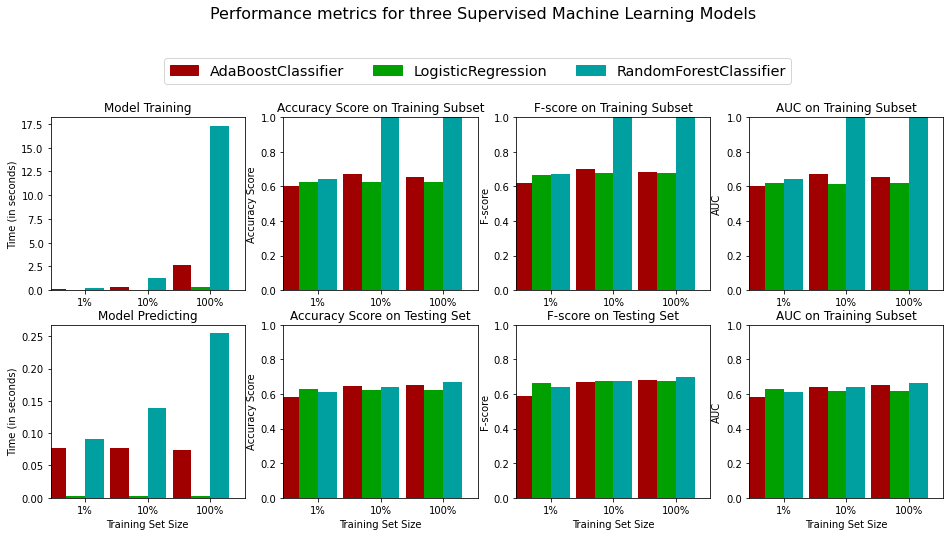

In [0]:
# Initialize the models
model_A = AdaBoostClassifier(random_state=0)
model_B = LogisticRegression(random_state=0, C=1.0)
model_C = RandomForestClassifier(random_state=0)

# Calculating the number of samples of 1%, 10%, 100% on training data
samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

result = {}

for model in [model_A, model_B, model_C]:
  model_name = model.__class__.__name__
  result[model_name] = {}
  for i, sample in enumerate([samples_1, samples_10, samples_100]):
    if(model == model_A):
      result[model_name][i] = train_predict(model, sample, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
    elif(model == model_B):
      result[model_name][i] = train_predict(model, sample, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
    else:
      result[model_name][i] = train_predict(model, sample, X_train_RF, y_train_RF, X_test_RF, y_test_RF)
  
evaluate(result, "Performance_unoptimized.jpg")


In [0]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def grid_search(model, parameters, X_train, y_train, X_test, y_test):
  score = make_scorer(roc_auc_score)
  grid = GridSearchCV(model, parameters, scoring=score)

  # Finding optimal parameters
  grid_fit = grid.fit(X_train, y_train)

  # Get the estimator
  best_model = grid_fit.best_estimator_

  # Prediction with unoptimized model
  prediction = (model.fit(X_train, y_train)).predict(X_test)
  best_prediction = best_model.predict(X_test)

  # Printing the difference between optimized and unoptimized models
  print(model.__class__.__name__)
  print("Unoptimized version \n")
  print("Accuracy score: {:.4f}".format(accuracy_score(y_test, prediction)))
  print("F-score: {:.4f}".format(fbeta_score(y_test, prediction, beta=1)))
  print("AUC: {:.4f}".format(roc_auc_score(y_test, prediction)))
  print("Optimized version \n")
  print("Accuracy score: {:.4f}".format(accuracy_score(y_test, best_prediction)))
  print("F-score: {:.4f}".format(fbeta_score(y_test, best_prediction, beta=1)))
  print("AUC: {:.4f}".format(roc_auc_score(y_test, best_prediction)))
  print(best_model)

In [0]:
parameters_RF = {"n_estimators": [10, 20, 50, 100, 250, 500]}
parameters_LR = {"penalty": ['l1', 'l2'], "C":[0.1, 0.5,1.,2.,2.5,5]}
parameters_ADA = {"n_estimators": [100, 200, 300, 400],"learning_rate": [0.1, 0.5,1]}

In [0]:
# Grid search for Adaboost
grid_search(model_A, parameters_ADA, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)

AdaBoostClassifier
Unoptimized version 

Accuracy score: 0.6542
F-score: 0.6832
AUC: 0.6513
Optimized version 

Accuracy score: 0.6573
F-score: 0.6878
AUC: 0.6540
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=200, random_state=0)


In [0]:
# Grid search for logistic regression
grid_search(model_B, parameters_LR, X_train_LR, y_train_LR, X_test_LR, y_test_LR)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

LogisticRegression
Unoptimized version 

Accuracy score: 0.6240
F-score: 0.6741
AUC: 0.6177
Optimized version 

Accuracy score: 0.6240
F-score: 0.6741
AUC: 0.6177
LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
# Grid search for Random Forest
grid_search(model_C, parameters_RF, X_train_RF, y_train_RF, X_test_RF, y_test_RF)

RandomForestClassifier
Unoptimized version 

Accuracy score: 0.6699
F-score: 0.7000
AUC: 0.6665
Optimized version 

Accuracy score: 0.6694
F-score: 0.7027
AUC: 0.6654
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


AdaBoostClassifier model is trained on 356 sample data 

Accuracy score: 0.5800756620428752 
F1: 0.5940014630577908 
AUC 0.5798269274624854
AdaBoostClassifier model is trained on 3567 sample data 

Accuracy score: 0.6438839848675915 
F1: 0.6704014939309056 
AUC 0.6414539184930587
AdaBoostClassifier model is trained on 35679 sample data 

Accuracy score: 0.6572509457755359 
F1: 0.6878015161957272 
AUC 0.6539708627556817
LogisticRegression model is trained on 356 sample data 

Accuracy score: 0.6332912988650694 
F1: 0.6677330895795247 
AUC 0.6296546661068321
LogisticRegression model is trained on 3567 sample data 

Accuracy score: 0.6221941992433796 
F1: 0.6729257641921398 
AUC 0.6159140616590046
LogisticRegression model is trained on 35679 sample data 

Accuracy score: 0.6239596469104666 
F1: 0.6740983606557378 
AUC 0.6177481489493155
RandomForestClassifier model is trained on 356 sample data 

Accuracy score: 0.6163934426229508 
F1: 0.6450408401400234 
AUC 0.6138797297897101
RandomFore

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


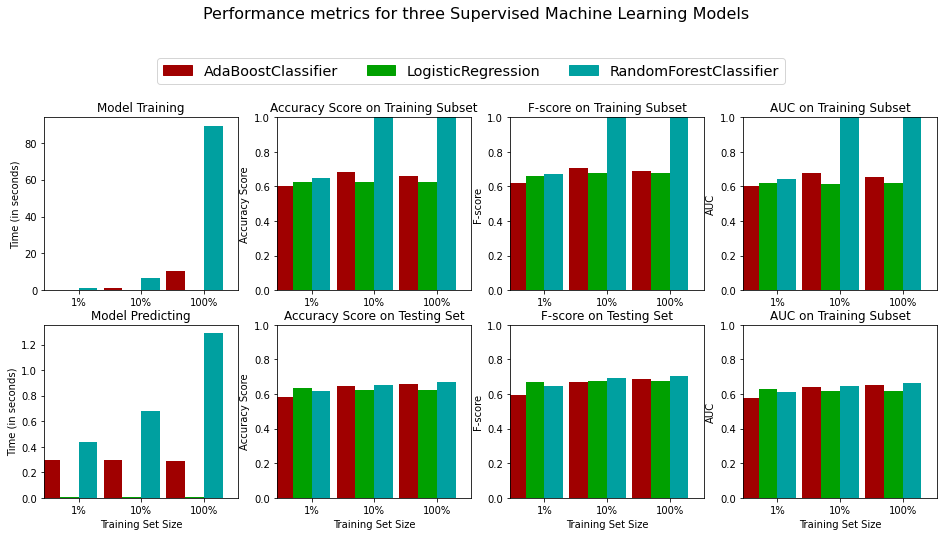

In [0]:
# Running models with refined hyperparameters
model_A = AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=0)
model_B = LogisticRegression(random_state=0, C=2.0)
model_C = RandomForestClassifier(random_state=0, n_estimators=500)

result = {}

for model in [model_A, model_B, model_C]:
  model_name = model.__class__.__name__
  result[model_name] = {}
  for i, sample in enumerate([samples_1, samples_10, samples_100]):
    if(model == model_A):
      result[model_name][i] = train_predict(model, sample, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
    elif(model == model_B):
      result[model_name][i] = train_predict(model, sample, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
    else:
      result[model_name][i] = train_predict(model, sample, X_train_RF, y_train_RF, X_test_RF, y_test_RF)
  
evaluate(result, "Performance_optimized.jpg")

AdaBoostClassifier model is trained on 356 sample data 

Accuracy score: 0.5804607365058012 
F1: 0.6119147612381397 
AUC 0.5777569465619758
AdaBoostClassifier model is trained on 3567 sample data 

Accuracy score: 0.6332604674625861 
F1: 0.6693951796271033 
AUC 0.6291663944126211
AdaBoostClassifier model is trained on 35679 sample data 

Accuracy score: 0.6514208844795696 
F1: 0.6838493213359768 
AUC 0.6477498883758412
LogisticRegression model is trained on 356 sample data 

Accuracy score: 0.5145451488145283 
F1: 0.6682753073652764 
AUC 0.49068460094817007
LogisticRegression model is trained on 3567 sample data 

Accuracy score: 0.5276610055490163 
F1: 0.6903318267004741 
AUC 0.5004479146247613
LogisticRegression model is trained on 35679 sample data 

Accuracy score: 0.6230031948881789 
F1: 0.6755426917510853 
AUC 0.6159934958508484
RandomForestClassifier model is trained on 356 sample data 

Accuracy score: 0.5937447452497058 
F1: 0.6362541403191809 
AUC 0.5891175406929047
RandomFor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


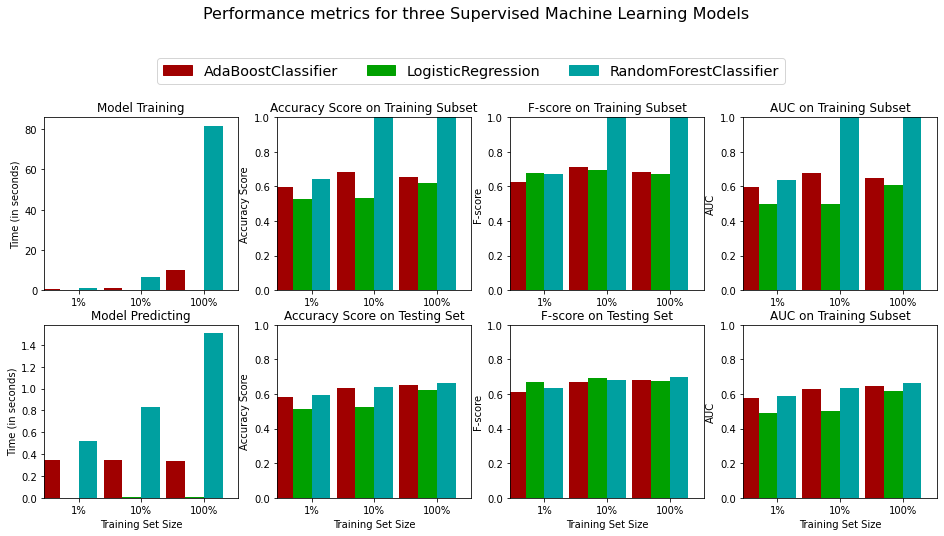

In [0]:
# Running models with different training and testing set split ratio
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, label_popularity, test_size=0.15, random_state=0)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, label_popularity, test_size=0.15, random_state=0)

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, label_popularity, test_size=0.15, random_state=0)

model_A = AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=0)
model_B = LogisticRegression(random_state=0, C=2.0)
model_C = RandomForestClassifier(random_state=0, n_estimators=500)

result = {}

for model in [model_A, model_B, model_C]:
  model_name = model.__class__.__name__
  result[model_name] = {}
  for i, sample in enumerate([samples_1, samples_10, samples_100]):
    if(model == model_A):
      result[model_name][i] = train_predict(model, sample, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)
    elif(model == model_B):
      result[model_name][i] = train_predict(model, sample, X_train_LR, y_train_LR, X_test_LR, y_test_LR)
    else:
      result[model_name][i] = train_predict(model, sample, X_train_RF, y_train_RF, X_test_RF, y_test_RF)
  
evaluate(result, "Performance_optimized_test.jpg")